<div style="text-align: center;">
    <h1 style="
        background: linear-gradient(135deg, hsla(312, 53%, 25%, 1.00), #8e1e8aff); 
        color: white; 
        padding: 15px 30px; 
        border-radius: 500px; 
        font-family: 'Segoe UI', Arial, sans-serif; 
        box-shadow: 0 4px 15px rgba(0,0,0,0.3);
        display: inline-block;
    ">
        Customer Data Preprocessing, Merging, and PCA Visualization
    </h1>
</div>


<h3 style="color:#DA0EFE">1. Import The Required Libraries</h3>

In [2]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import matplotlib.pyplot as plt

<h2 style="color:#DA0EFE; display:inline;">
  <strong>2.Data Loading </strong>
</h2>
<h3 style="color:#DA0EFE; display:inline; margin-left:8px;">
(Customer data with some missing values)
</h3>


In [3]:
data_customers = {
    'customer_id': range(1, 11),
    'age': [25, 30, 35, 40, np.nan, 50, 55, 60, 65, 70],
    'income': [5000, 6000, 5500, 7000, 8000, 8500, 9000, 9500, 10000, 11000],
    'spending': [200, 250, 180, 300, 350, 400, 450, 500, 550, 600],
    'city': ['Cairo', 'Alexandria', 'Cairo', 'Giza', 'Alexandria', 'Cairo', 'Giza', 'Cairo', 'Alexandria', 'Giza']
}

<h3 style="color:#DA0EFE">3. Convert the data into a DataFrame </h3>

In [4]:
df_customers = pd.DataFrame(data_customers)

<h3 style="color:#DA0EFE">4. Display the first 5 rows of the data </h3>

In [5]:
print("Original Data:")
print(df_customers.head())

Original Data:
   customer_id   age  income  spending        city
0            1  25.0    5000       200       Cairo
1            2  30.0    6000       250  Alexandria
2            3  35.0    5500       180       Cairo
3            4  40.0    7000       300        Giza
4            5   NaN    8000       350  Alexandria


<h2 style="color:#DA0EFE; display:inline;">
  <strong>5. Data Cleaning</strong>
</h2>
<h3 style="color:#DA0EFE; display:inline; margin-left:8px;">
Handling Missing Values (NaN) & Replacing missing values in "age" with the mean value
</h3>


In [ ]:
df_customers['age'].fillna(df_customers['age'].mean(), inplace=True)

<h3 style="color:#DA0EFE">6.Removing duplicate customers (in case there are any duplicate entries)</h3>

In [7]:
df_customers.drop_duplicates(subset=['customer_id'], keep='first', inplace=True)

<h3 style="color:#DA0EFE">7. Display the cleaned data</h3>

In [8]:
print("\nCleaned Data:")
print(df_customers.head())


Cleaned Data:
   customer_id        age  income  spending        city
0            1  25.000000    5000       200       Cairo
1            2  30.000000    6000       250  Alexandria
2            3  35.000000    5500       180       Cairo
3            4  40.000000    7000       300        Giza
4            5  47.777778    8000       350  Alexandria


<h2 style="color:#DA0EFE; display:inline;">
  <strong>8. Feature Selection</strong>
</h2>
<h3 style="color:#DA0EFE; display:inline; margin-left:8px;">
 Selecting only the relevant columns
</h3>


In [9]:
df_selected = df_customers[['customer_id', 'age', 'income', 'spending', 'city']]
print("\nData After Feature Selection:")
print(df_selected.head())


Data After Feature Selection:
   customer_id        age  income  spending        city
0            1  25.000000    5000       200       Cairo
1            2  30.000000    6000       250  Alexandria
2            3  35.000000    5500       180       Cairo
3            4  40.000000    7000       300        Giza
4            5  47.777778    8000       350  Alexandria


<h2 style="color:#DA0EFE; display:inline;">
  <strong>9. One-Hot Encoding</strong>
</h2>
<h3 style="color:#DA0EFE; display:inline; margin-left:8px;">
Encoding categorical data (city column)
</h3>


In [10]:
df_encoded = pd.get_dummies(df_selected, columns=['city'], drop_first=True)

<h3 style="color:#DA0EFE">10.Display the data after encoding</h3>

In [11]:
print("\nData After One-Hot Encoding:")
print(df_encoded.head())


Data After One-Hot Encoding:
   customer_id        age  income  spending  city_Cairo  city_Giza
0            1  25.000000    5000       200        True      False
1            2  30.000000    6000       250       False      False
2            3  35.000000    5500       180        True      False
3            4  40.000000    7000       300       False       True
4            5  47.777778    8000       350       False      False


<h2 style="color:#DA0EFE; display:inline;">
  <strong>11. Merging Data: Simulating a merge with another dataset (e.g., `df_orders`)</strong>
</h2>
<h3 style="color:#DA0EFE; display:inline; margin-left:8px;">
Let's assume we have another DataFrame containing customer orders
</h3>


In [12]:
data_orders = {
    'customer_id': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'order_id': [101, 102, 103, 104, 105, 106, 107, 108, 109, 110],
    'order_total': [500, 600, 700, 800, 900, 1000, 1100, 1200, 1300, 1400]
}
df_orders = pd.DataFrame(data_orders)

<h3 style="color:#DA0EFE">12.Merging the customer data with the order data on 'customer_id'</h3>

In [13]:
df_merged = pd.merge(df_encoded, df_orders, on='customer_id', how='outer')

<h3 style="color:#DA0EFE">13.Display the merged data</h3>

In [14]:
print("\nMerged Data:")
print(df_merged.head())


Merged Data:
   customer_id        age  income  spending  city_Cairo  city_Giza  order_id  \
0            1  25.000000    5000       200        True      False       101   
1            2  30.000000    6000       250       False      False       102   
2            3  35.000000    5500       180        True      False       103   
3            4  40.000000    7000       300       False       True       104   
4            5  47.777778    8000       350       False      False       105   

   order_total  
0          500  
1          600  
2          700  
3          800  
4          900  


<h2 style="color:#DA0EFE; display:inline;">
  <strong>14.Dimensionality Reduction using PCA</strong>
</h2>
<h3 style="color:#DA0EFE; display:inline; margin-left:8px;">
Reducing the data from 3 dimensions (age, income, spending) to 2 dimensions (PCA1 and PCA2)
</h3>


In [15]:
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(df_merged[['age', 'income', 'spending', 'order_total']])

<h3 style="color:#DA0EFE">15.Adding the reduced PCA components to the DataFrame</h3>

In [16]:
df_merged['PCA1'] = reduced_data[:, 0]
df_merged['PCA2'] = reduced_data[:, 1]

<h3 style="color:#DA0EFE">16.Display the data after applying PCA</h3>

In [17]:
print("\nData After PCA:")
print(df_merged.head())


Data After PCA:
   customer_id        age  income  spending  city_Cairo  city_Giza  order_id  \
0            1  25.000000    5000       200        True      False       101   
1            2  30.000000    6000       250       False      False       102   
2            3  35.000000    5500       180        True      False       103   
3            4  40.000000    7000       300       False       True       104   
4            5  47.777778    8000       350       False      False       105   

   order_total         PCA1        PCA2  
0          500 -2989.289368  -13.973344  
1          600 -1984.387364  -61.239238  
2          700 -2468.096966  111.152625  
3          800  -964.863697   -9.457842  
4          900    40.058572  -56.605326  


<h2 style="color:#DA0EFE; display:inline;">
  <strong>17.Data Transformation</strong>
</h2>
<h3 style="color:#DA0EFE; display:inline; margin-left:8px;">
Standardizing the data using StandardScaler
</h3>


In [18]:
scaler = StandardScaler()
df_merged[['age', 'income', 'spending', 'order_total']] = scaler.fit_transform(df_merged[['age', 'income', 'spending', 'order_total']])

<h3 style="color:#DA0EFE">18.Display the standardized data</h3>

In [19]:
print("\nData After Standardization:")
print(df_merged.head())


Data After Standardization:
   customer_id       age    income  spending  city_Cairo  city_Giza  order_id  \
0            1 -1.588718 -1.539363 -1.279417        True      False       101   
1            2 -1.239975 -1.017545 -0.920030       False      False       102   
2            3 -0.891232 -1.278454 -1.423172        True      False       103   
3            4 -0.542489 -0.495727 -0.560644       False       True       104   
4            5  0.000000  0.026091 -0.201257       False      False       105   

   order_total         PCA1        PCA2  
0    -1.566699 -2989.289368  -13.973344  
1    -1.218544 -1984.387364  -61.239238  
2    -0.870388 -2468.096966  111.152625  
3    -0.522233  -964.863697   -9.457842  
4    -0.174078    40.058572  -56.605326  


<h3 style="color:#DA0EFE">19.Visualizing the data after dimensionality reduction using PCA</h3>

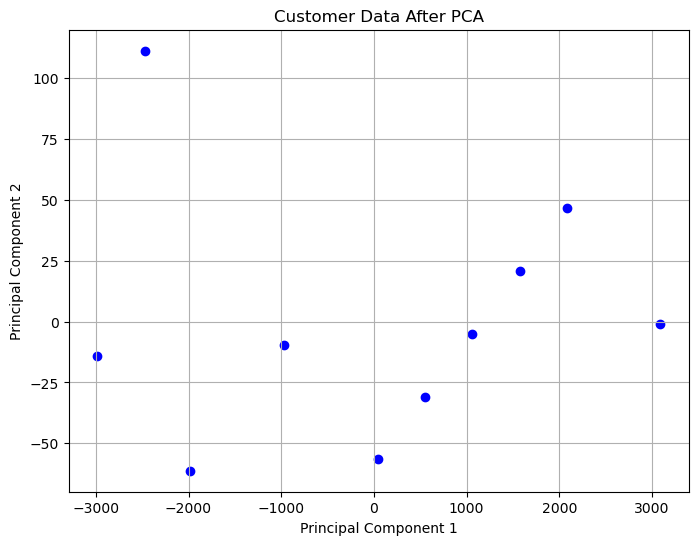

In [20]:
plt.figure(figsize=(8, 6))
plt.scatter(df_merged['PCA1'], df_merged['PCA2'], color='blue')
plt.title('Customer Data After PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()